### Формирование сигнала на борту NOAA

Как вы можете помнить, длина строки в формате APT составляет 2080 пикселей (909 пикселей для каждого изображения). Одна строка APT состоит из одной строки для видео канала A, за которой следует одна строка для видео канала Б, где канал A - видимый, а Б - ИК. В процессе формирования сигналов APT система вставляет информацию о калибровке и телеметрии, что приводит к образованию изображения, показанного ниже.

<img src="https://noaa-apt.mbernardi.com.ar/examples/argentina.png" alt="" style="width: 600px;"/>

Рассмотрим, как формируется одна строка изображения в формате APT. 

Для видимой и инфракрасной части генерация сигналов идентична: в основе лежат 909 пикселей основного изображения, потом к ним добавляются данные телеметрии, а уже после добавляется синхроимпульс.

| | | Канал А | | | | | | Канал Б | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
|| Синхроимпульс | Телеметрия | Данные | Телеметрия | | | Синхроимпульс | Телеметрия | Данные | Телеметрия ||

Синхроимпульс – это уникальная последовательность данных, которая не должна встречаться нигде в области данных и служит для определения начала каждой строки, то есть позволяет принимающему программному обеспечению выровнять получаемые данные. 

Кроме того, в получаемых данных есть минутные метки, которые представляют собой четыре строки, чередующиеся черными и белыми линиями, которые повторяются каждые 60 секунд (120 строк). Канал Б всегда является ИК-каналом, поэтому пробелы белые, а маркеры черные. Когда канал А является видимым, пробелы черные, а минутные маркеры белые.

*В дневное время формат APT показывает видимые данные и данные ИК. Ночью спутник может вставить данные из другого ИК-канала, чтобы заменить видимый канал, поскольку данные видимого канала будут отображаться чёрными.*

Телеметрия — это блоки с информацией о переменных, которые необходимы для калибровки снимка и вычисления информации о температуре подстилающей поверхности Земли.

<img src="https://sourceforge.isae.fr/attachments/download/2371/APTexample.png" alt="" style="width: 600px;"/>

<img src="https://github.com/tom2238/apt-encoder/raw/master/doc/apt_frame.png" alt="" style="width: 600px;"/>

Изучив формат кадра, показанный на рисунке выше, можно увидеть, что оба канала A и B имеют серию из 16 блоков, называемых «клиньями», используемых при калибровке изображения APT. Каждый из таких клиньев состоит из 8 последовательных строк. Таким образом, раздел телеметрии состоит из шестнадцати клиньев по 8 повторяющихся строк каждый, которые используются в качестве эталонных значений для декодирования каналов изображения.

*Первые восемь клиньев начинаются с 1/8 максимальной интенсивности и последовательно увеличиваются на 1/8 до полной интенсивности в восьмом сегменте, причем девятый имеет нулевую интенсивность. Каждый из клиньев с десятого по пятнадцатый кодирует данные о калибровке датчика. Между каналами А и Б различаются только клинья 15 (значение "заднего сканирования", когда один из ИК-радиометров "смотрит" на излучатель черного тела) и 16 (идентификатор канала).*

Шестнадцать блоков телеметрии повторяются каждые 128 строк, и эти 128 строк называются кадром.

| Имя         | Длина          | Описание |
| :--         | :--            | :--      |
| Sync A      | 39             | Биты 000011001100110011001100110011000000000 |
| Space A     | 47             | |
| Image A     | 909            | Пиксели изображения: чем выше амплитуда - тем ярче пиксель |
| Telemetry A | 45             | |
| Sync B      | 39             | Биты 000011100111001110011100111001110011100 |
| Space B     | 47             | |
| Image B     | 909            | Пиксели изображения: чем выше амплитуда - тем ярче пиксель |
| Telemetry B | 45             | |
| **Total**   | **2080 / 0.5 сек** | |

<img src="https://github.com/tom2238/apt-encoder/raw/master/doc/apt_line_format.png" alt="" style="width: 600px;"/>

Особенностью спутниковой связи является необходимость работы в условиях сравнительно малого отношения сигнал/шум, вызванного значительной удалённостью приёмника от передатчика и ограниченной мощностью спутника. Для передачи цифровых данных по спутниковому каналу связи они должны быть сначала преобразованы в радиосигнал, занимающий определённый частотный диапазон. Для этого применяется модуляция.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Amfm3.gif" alt="" style="width: 400px;"/>

**Зачем нужна модуляция?** При передаче информации на малые расстояния часто используются низкочастотные колебания, передача которых на расстояние свыше нескольких метров крайне затруднительна, в силу их быстрого ослабевания. Но при необходимости передачи сигналов на бОльшие расстояния на помощь приходит модуляция.

**В чем суть модуляции?** Возьмем высокочастотное колебание. Само по себе оно не несет никакой информации. Его мы будем использовать в качестве основного компонента передаваемого сигнала. Частоту этого колебания называют несущей. Для того, чтобы начать передавать полезную информацию, нам нужно каким-нибудь образом видоизменить несущую частоту так, чтобы она повторяла закономерности сигнала, который мы хотим передать. Иными словами, нам нужно сделать так, чтобы она несла информацию о нашем полезном сигнале. Это самое видоизменение называется модуляцией. Модуляция осуществляется с помощью модулятора со стороны отправителя, а с помощью демодулятора на стороне получателя высокочастотный сигнал преобразуется обратно в низкочастотный. Они собраны в одно устройство под названием модем, которое получилось благодаря слиянию слов МОдулятор и ДЕМодулятор.

<img src="http://neerc.ifmo.ru/wiki/images/5/57/Analog_modulation.png" alt="" style="width: 500px;"/>

В системе, используемой NOAA-19, используется амплитудная и частотная модуляции. 

*Сначала данные модулируются по амплитуде с помощью поднесущей 2,4 кГц, что приводит к формированию аналогового сигнала с полосой пропускания 34 кГц. Сделано это для уменьшения влияния помех при генерации сигнала на борту спутника NOAA-19. Перед непосредственной передачей на землю сигнал дополнительно модулируется по частоте 136-138 МГц (в зависимости от спутника), чтобы на этой частоте сигнал не сильно затухал, проходя через толщу атмосферы..*

Частотная демодуляция производится приемником сигнала, так что разберемся с амплитудной.

Рассмотрим простой пример. Допустим, что мы используем любой из видов цифровой передачи информации, для обозначения логической единицы мы передаём сигнал, а для логического нуля молчим. 

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


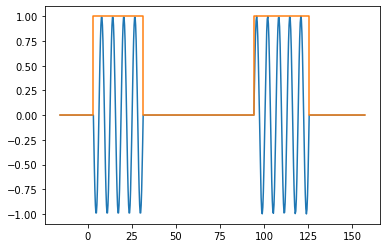

In [66]:
%pylab inline

x = np.array([-5 * pi])
x = np.append(x, np.linspace(pi, 10 * pi, 100))
x = np.append(x, np.linspace(30 * pi, 40 * pi, 100))
x = np.append(x, [50 * pi])

y = [-5 * pi, pi, pi, 10 * pi, 10 * pi, 30 * pi, 30 * pi, 40 * pi, 40 * pi, 50 * pi]

plot(x, np.sin(x))
plot(y, [0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

Важно отметить что синяя гармоническая частота может быть любая, но должна доходить до получателя сигнала без существенного затухания. 

Для демодуляции сигнала, который вы отобразили на прошлом занятии, можно использовать преобразование Гильберта.

**Практическая работа**

1. Выполните преобразование Гильберта для набора данных, полученного на прошлом занятии (в результате получите аналитический сигнал), используя функцию `hilbert` из пакета `scipy`.
2. Вычислите и отобразите огибающую амплитуды (amplitude envelope) получившегося аналитического сигнала.

In [67]:
#from google.colab import drive
#drive.mount('/content/drive')
#FOLDERPATH = '/content/drive/My Drive/signal.wav'

In [68]:
from scipy.io import wavfile
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import numpy as np

######################## получение сигнала и частоты дискретизации 
sample_rate, data = wavfile.read('signal.wav')
data = np.array(data, dtype=float)
n_data = (data - 128) / 12
sample_rate

11025

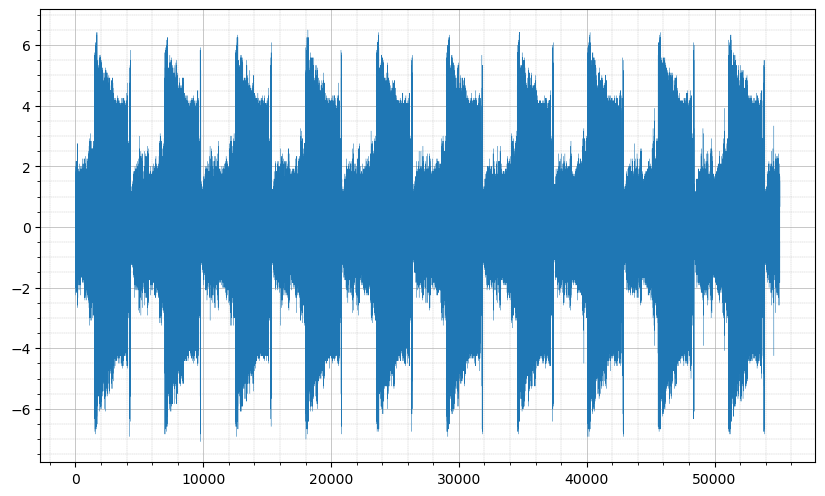

In [69]:
###### график сигнала
start, finish = 300, 305
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.plot(n_data[start * sample_rate : finish * sample_rate], linewidth=0.2)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

plt.show()

In [70]:
############################## амплитудная демодуляция
analytic_signal = hilbert(n_data)
amplitude_envelope = np.abs(analytic_signal)
print(amplitude_envelope[1000:1500])

[1.98305585 2.39372738 2.82216971 2.61179417 2.12931808 2.00229087
 2.4635996  3.04215722 3.11509068 2.66667198 1.98604415 1.45667127
 1.19025773 1.08849226 1.6119159  2.13474198 2.42075002 2.78827636
 2.77381931 2.16474182 1.32307162 1.05935155 2.05150288 2.50452719
 1.74868915 1.23277519 2.21179225 3.06769474 2.96659987 1.69771203
 0.93788586 1.67584122 2.52939199 2.92604001 3.0834329  3.15259723
 2.67358126 2.03274073 1.81007984 1.9264681  2.04644475 2.16668944
 2.52728279 3.03063673 3.04819142 2.28912418 1.33343815 0.99862432
 1.08410992 1.19049808 1.50543077 2.70174204 3.05591081 2.37074897
 2.09087025 2.42427491 3.18062401 3.27894956 1.96860315 1.06796146
 1.5049572  2.65162828 3.050847   2.25703507 1.56190218 1.32682058
 2.50014612 3.33300139 4.05935305 3.71558433 2.70916185 2.85674631
 3.43810005 3.76621887 2.86208545 1.80070155 2.26361814 3.17898527
 3.43056792 2.17929401 1.47898255 3.07690274 3.69298468 3.29945122
 1.54921783 2.25965254 2.46338014 1.7052165  3.44710608 2.7046

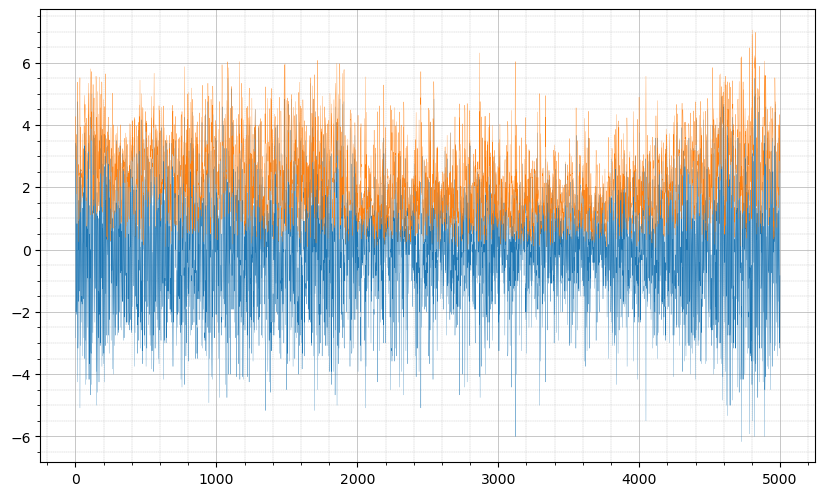

In [71]:
####### график полсе демодуляции
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.plot(n_data[300000 : 305000], linewidth=0.2)
ax.plot(amplitude_envelope[300000 : 305000], linewidth=0.2)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

plt.show()

Рассмотрим цифровую запись аналогового сигнала.

Чтобы записать непрерывный сигнал в цифровой формат, нужно сначала определить частоту записи, то есть количество значений в секунду. Это значение называется частотой дискретизации (частота взятия отсчётов непрерывного по времени сигнала при его дискретизации).

Теперь рассмотрим один период синусоиды. Какого минимального количества произвольных точек будет достаточно для однозначного определения её амплитуды и частоты?

Согласно [теореме Котельникова](https://ru.wikipedia.org/wiki/Теорема_Котельникова), нам нужно взять более двух точек на один период (чтобы однозначно восстановить исходный сигнал, частота дискретизации должна более чем в два раза превышать наибольшую частоту в спектре сигнала). Тогда, используя [дискретное преобразование Фурье](https://ru.wikipedia.org/wiki/Дискретное_преобразование_Фурье), мы сможем выделить исходный сигнал. 

Погружаться в данные преобразования и теоремы мы не станем, так как наш сигнал заведомо можно расшифровать, и делать мы это будем, используя библиотеки Python. Подробнее с этими понятиями вы познакомитесь на старших курсах.

Вы уже знаете, что в нашем аудиофайле за одну секунду передаётся 11025 значений, и что на изображении в формате APT это 2 строки. Значит наш исходный сигнал нужно преобразовать в матрицу шириной 5512 (11025/2) элементов. И полученную матрицу преобразовать и изображение.

**Практическая работа**

1. Преобразуйте полученную в прошлом задании огибающую амплитуды в матрицу шириной 5512 элементов.
2. Получите и отобразите из получившейся матрицы изображение.

In [72]:
########## разбиение на строки
print(len(amplitude_envelope))
matrix = np.array(amplitude_envelope[:1288*5512]).reshape(int(len(amplitude_envelope) / 5512), 5512)
np.append(matrix, amplitude_envelope[1288*5512:])
print(len(amplitude_envelope[1288*5512:]))
print(matrix)

7099649
193
[[3.12594758 3.52599835 2.39679307 ... 2.23148334 0.25007958 2.19237331]
 [2.37759615 1.68638688 0.45011188 ... 4.86426737 5.34152335 4.08123135]
 [3.40732479 3.19111688 2.57266451 ... 2.13653457 1.34311439 2.17570187]
 ...
 [1.11348892 1.70776004 2.11380092 ... 2.90450738 4.71138545 3.95406185]
 [3.01205598 2.08565269 1.18281745 ... 2.28847077 2.27758576 2.41816532]
 [1.84712604 0.48084212 0.43889992 ... 0.3719665  1.63736117 2.38886136]]


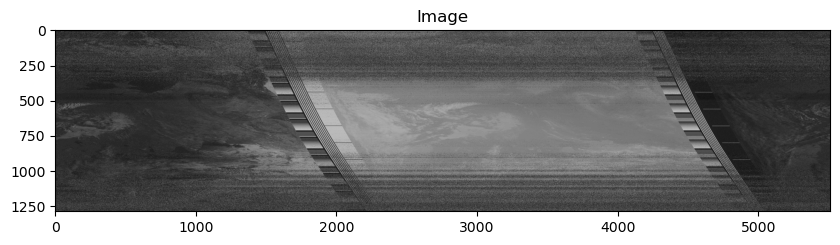

In [73]:
####### промежуточный результат изображения
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(matrix[:-1], cmap='gray')
plt.title('Image')
plt.show()

In [74]:
######### уменьшаем кол-во точек, чтобы на 1 пиксель было 1 значение
from scipy import signal
resampled_signal = signal.resample(amplitude_envelope, int(4160*(len(amplitude_envelope))/sample_rate))
resampled_signal /= resampled_signal.max()
print(len(resampled_signal))

2678869


39


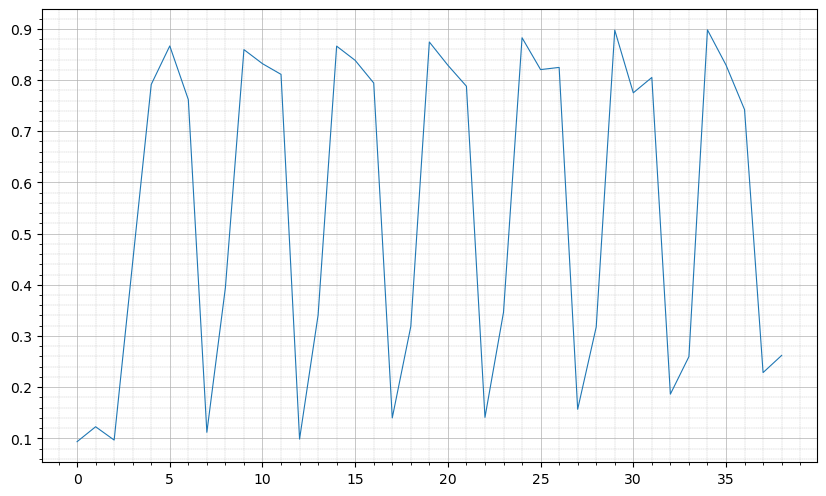

In [75]:
########################## находим синхроимпульс
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
mas = resampled_signal[1300000 + 6200 + 500 + 70 + 25 + 0 : 1310000 - 2200 - 700 - 250 - 15 - 1]
print(len(mas))
ax.plot(mas, linewidth=0.8)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

plt.show()

0
[[ 0.41723118  0.24960614  0.1936996  ...  0.21237892  0.18874958
   0.21870603]
 [ 0.23370899  0.08629787  0.13418148 ...  0.27125332  0.32988331
   0.64781728]
 [ 0.36778376  0.22962666  0.18524067 ...  0.31745644  0.22032181
   0.28725481]
 ...
 [-0.02583146  0.42891742  0.25532895 ...  0.3315714   0.29471401
   0.17253425]
 [ 0.12513689  0.31520367  0.32487399 ...  0.27084232  0.29856585
   0.27024139]
 [ 0.21316588  0.06492895  0.12803092 ...  0.13306076  0.38225549
   0.15667913]]


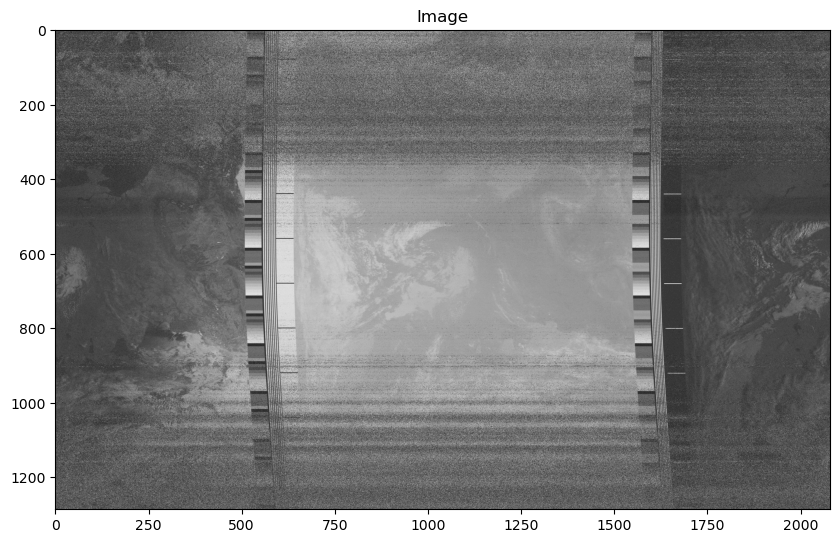

In [76]:
##### разбиваем матрицу на строки и строим изображение
matrix = np.array(resampled_signal[:2080*1287]).reshape(int(len(resampled_signal) / 2080), 2080)
np.append(matrix, resampled_signal[1288*2080:])
print(len(resampled_signal[1288*2080:]))
print(matrix)

fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(matrix[:-1], cmap='gray')
plt.title('Image')
plt.show()

In [77]:
###################### поиск начала синхроимпульса
indexes = []
i = 0
ind = 0
while i < len(matrix):
    minind = []
    for ind in range(1040):
        part = matrix[i][ind : ind + len(mas)]
        minind.append(abs((part - mas).mean()))
    indexes.append(np.array(minind).argmin())
    i += 1
    print(i)
        
indexes = np.array(indexes)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


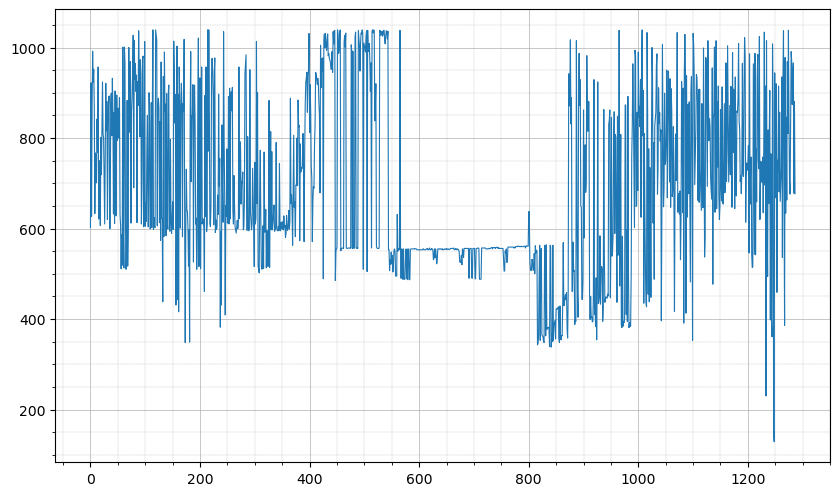

In [78]:
######### график полученных индексов начала синхроимпульса
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.plot(indexes, linewidth=0.8)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

plt.show()

In [79]:
matrix1 = np.copy(matrix)

557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
558
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
559
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
561
562
562
562
562
562
562
562
562
562
562
562
562
562
562
562
562
562
562
562
562
562
563
563
563
563
563
563
563
563
563
563
563
563
563
563
563
563
563
563
563
563
563
564
564
564
564
564
564
564
564
564
564
564
564
564
564
564
564
564
564
564
564
564
565
565
565
565
565
565
565
565
565
565
565
565
565
565
565
565
565
565
565
565
565
566
566
566
566
566
566
566
566
566
566
566
566
566
566
566
566
566
566
566
566
566
567
567
567
567
567
567
567
567
567
567
567
567
567
567
567
567
567
567
567
567
567
568
568
568
568
568
568
568
568
568
568
568
568
568
568
568
568
568
568
568
568


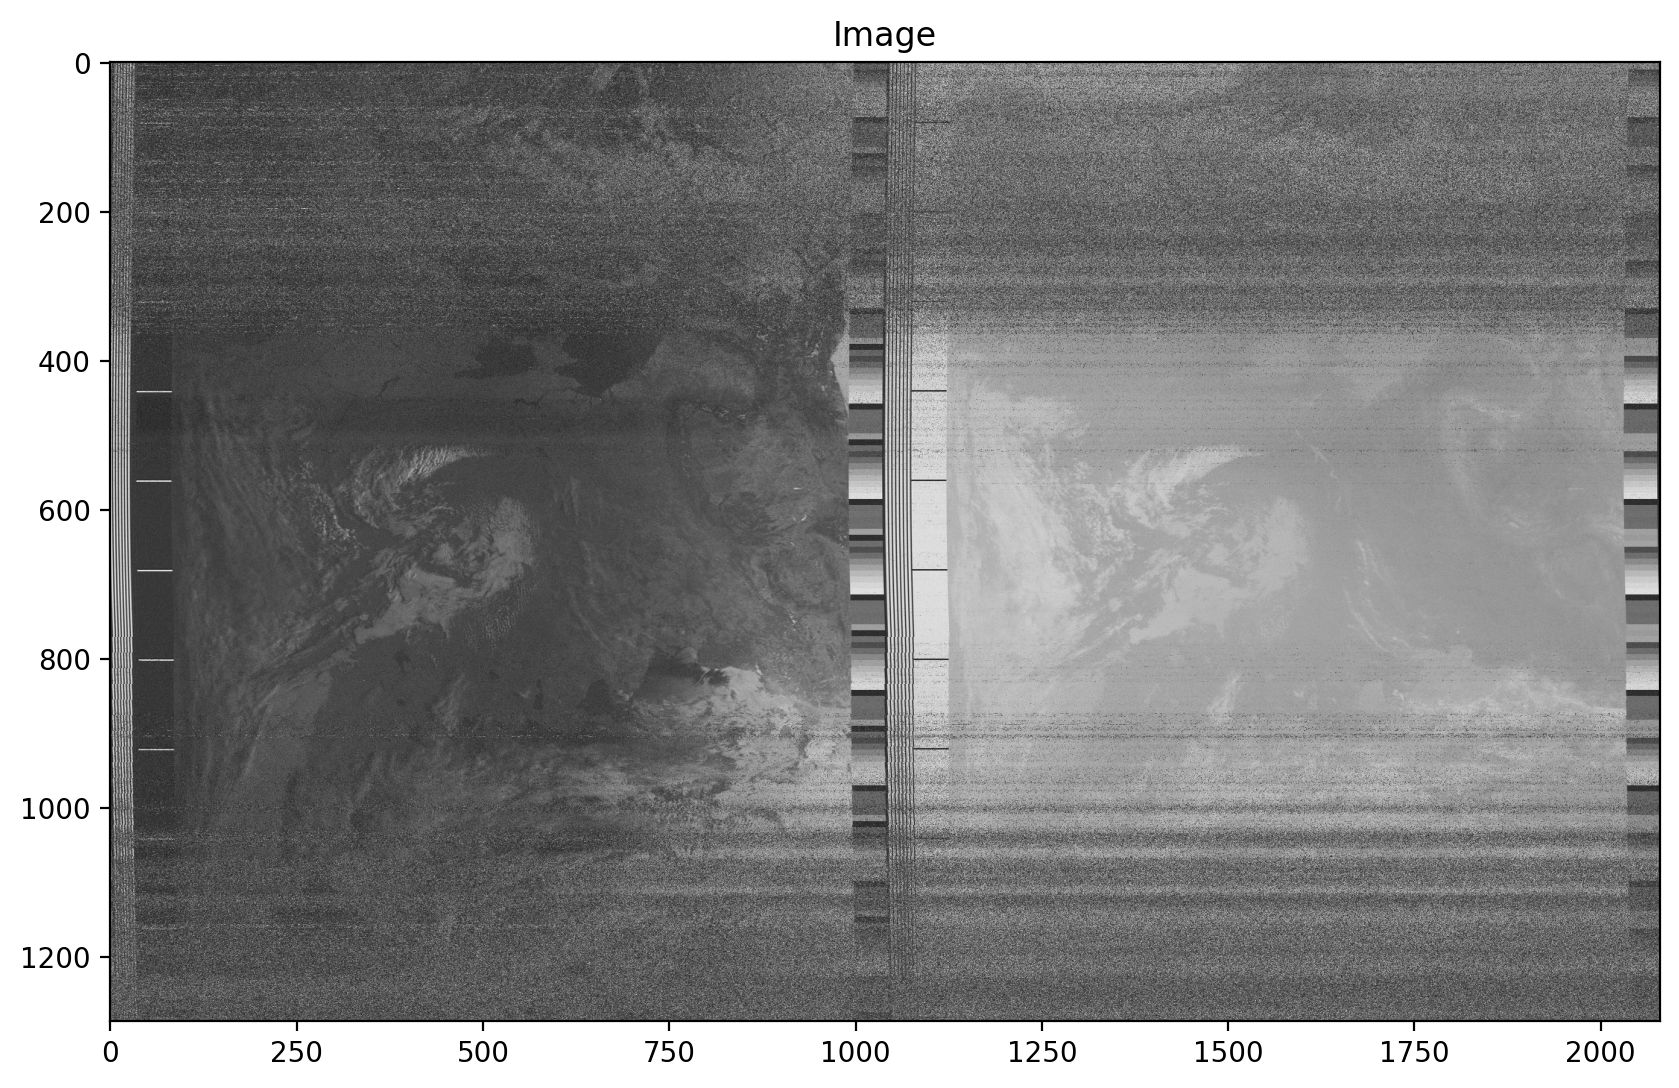

In [80]:
######################### построение изображения и синхронизация
matrix1 = np.copy(matrix)
indexmin = int(indexes[600:750].mean()) + 8
for i in range(750):
    #print(i)
    m1 = np.copy(matrix1[i])
    for j in range(indexmin + 1040 + 1, 2080):
        matrix1[i][j - indexmin - 1040 - 1] = m1[j]
    for j in range(0, indexmin + 1040 + 1):
        matrix1[i][j + (2080 - (indexmin + 1040 + 1))] = m1[j]
counter = 1
for i in range(750, len(matrix1)):
    #print(i)
    m1 = np.copy(matrix1[i])
    for j in range(indexmin + 1040 + 1, 2080):
        matrix1[i][j - indexmin - 1040 - 1] = m1[j]
    for j in range(0, indexmin + 1040 + 1):
        matrix1[i][j + (2080 - (indexmin + 1040 + 1))] = m1[j]
    if counter % 21 == 0:
        indexmin += 1
    counter += 1
    print(indexmin)

matrix1 = np.array(matrix1)
fig, ax = plt.subplots(figsize=(10, 7), dpi=200)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(matrix1[:-1], cmap='gray')
plt.title('Image')
plt.show()

In [81]:
matrix1 *= 255 ################ нормализация

In [82]:
temperature_lines = matrix1[600:800, 2080 - 45:] ### вырезаем телеметрию

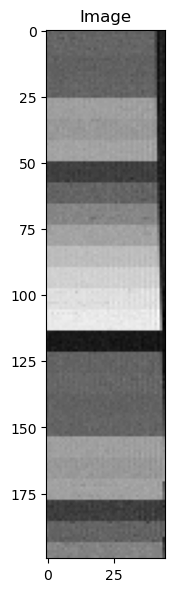

In [83]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(temperature_lines, cmap='gray')
plt.title('Image')
plt.show()

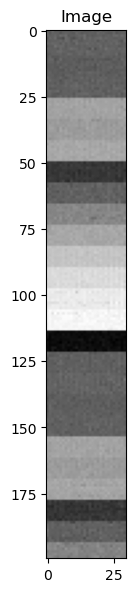

In [84]:
temperature_lines = temperature_lines[:, :30]
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(temperature_lines, cmap='gray')
plt.title('Image')
plt.show()

In [85]:
########### находим координаты чёрной полосы (чтобы по ней ориентироваться)
#print(temperature_lines)
index_black = []
for i in range(0, len(temperature_lines), 1):
    if temperature_lines[i].mean() < 0.1 * 255:
        index_black.append(i)
    print(temperature_lines[i].mean())
index_black = np.array(index_black)
print(index_black)


92.2913693630132
91.935729591914
95.6303414655607
93.48970413792789
94.3667253170561
95.88635655315278
94.09467453905981
94.93283930650213
95.28820905744017
94.44424656302047
91.78164302402782
89.36226501358146
91.54857827603279
91.24181914675862
90.79971915081428
89.72122236029573
92.06461625209245
91.3616502876212
93.43192109118509
93.58639115128545
92.81911432489464
95.36501238998554
93.49994896495993
94.01726614825783
93.5855181075408
92.698170368919
147.4437122637418
148.4278025200144
150.0214594860228
148.43702255571856
148.95415158037596
148.66776099679439
148.13804329840562
148.0979889654407
141.0506139835832
142.70907124010893
143.11462075853686
142.77399492788174
143.11738576611748
143.01613429301682
142.75249686547102
143.3321196788938
151.5517898459707
152.93915154892827
152.0880305640909
152.48816930461152
153.10563257938944
153.52557205648034
151.58795990815497
153.14943248534018
59.46052789205647
59.037193004708804
60.82645250427469
58.32448889871916
58.696631729962306
5

In [86]:
########################## вычисление температуры
temperatures = []
for i in range(122, 171 - 8, 8):
    tmp = []
    for j in range(i, i + 8):
        tmp.append(temperature_lines[j].mean())
    print(tmp)
    temperatures.append(np.array(tmp).mean())
print()
print(temperatures)

[92.60744858137039, 92.98416840522636, 93.3449050087959, 92.95503955762508, 93.51765129284382, 92.52397423776411, 93.68964839636146, 92.62300494237316]
[96.70630971571619, 96.56688627927387, 96.85759027825299, 95.89223753568604, 95.42939287450234, 96.08631510230317, 96.53315232849765, 95.36557664397658]
[91.80985051912012, 91.79373492431525, 90.67660165061024, 91.82559098227831, 90.65276898814521, 91.50247160917722, 92.50017044032022, 92.34573169257092]
[93.57406836183348, 94.74355940183979, 93.73592722937437, 94.12501193959228, 93.77130478912805, 93.84191753521206, 92.79387698990058, 93.75813116301062]
[149.26076711943404, 149.16542681215714, 148.4281860007933, 148.0354223297999, 149.2666834458181, 147.72936755750686, 148.79483253316207, 149.83180465965447]
[142.39776201692652, 142.133796121211, 142.4808195590209, 141.7400730145735, 143.07101684179392, 143.417136463485, 143.1072811728351, 142.31613768610987]

[93.03073005279504, 96.17968259477611, 91.63836510081718, 93.7929746762364, 

In [87]:
############## дальше всё по формулькам
C_T1, C_T2, C_T3, C_T4, C_BB, C_S = temperatures

In [88]:
T_PRT1 = 276.6067 + 0.051111*C_T1 + 1.405783*0.000001*(C_T1**2)
T_PRT2 = 276.6119 + 0.051090*C_T2 + 1.496037*0.000001*(C_T2**2)
T_PRT3 = 276.6311 + 0.051033*C_T3 + 1.496990*0.000001*(C_T3**2)
T_PRT4 = 276.6268 + 0.051058*C_T4 + 1.493110*0.000001*(C_T4**2)

In [89]:
T_BB = (T_PRT1 + T_PRT2 + T_PRT3 + T_PRT4) / 4
Tst_BB = 1.67396 + T_BB * 0.997364
print(Tst_BB)

282.34774548249015


In [90]:
N_BB = (1.1910427 * (10**(-5)) * (2670**3)) / (np.exp((1.4387752 * 2670) / Tst_BB) - 1)
print(N_BB)

0.27963721296085314


In [91]:
def NE(CE, NBB, CBB, CS):
    N_E = np.abs(NBB * (CS - CE) / (CS - CBB))
    return N_E

def TSTE(N_E):
    Tst_E = (1.4387752 * 2670) / np.log(1 + (1.1910427 * (10**(-5)) * (2670**3) / N_E))
    return Tst_E

def TE(Tst_E):
    T_E = (Tst_E - 1.67396) / 0.997364
    return T_E

In [92]:
matrix2 = np.copy(matrix1)
for i in range(len(matrix2)):
    matrix2[i][1040:2080] = NE(matrix2[i][1040:2080], N_BB, C_BB, C_S)
    print(matrix2[i])
    matrix2[i][1040:2080] = TSTE(matrix2[i][1040:2080])
    print(matrix2[i])
    matrix2[i][1040:2080] = TE(matrix2[i][1040:2080])
    print(matrix2[i])

[119.5904089   94.89298617  57.61972384 ...   2.05433708   2.09061603
   1.76047049]
[119.5904089   94.89298617  57.61972384 ... 330.83949165 331.3390175
 326.49879029]
[119.5904089   94.89298617  57.61972384 ... 330.03550524 330.53635132
 325.68333156]
[125.59099285  87.52721556  99.17990831 ...   0.9738763    4.61707743
   2.03322324]
[125.59099285  87.52721556  99.17990831 ... 310.85669373 355.64242725
 330.54540366]
[125.59099285  87.52721556  99.17990831 ... 309.99989345 354.90399418
 329.74063998]
[ -1.76059444  72.94504405 115.0835083  ...   1.20765928   1.33446823
   3.19091228]
[ -1.76059444  72.94504405 115.0835083  ... 316.36468659 318.9876875
 343.88069266]
[ -1.76059444  72.94504405 115.0835083  ... 315.52244375 318.15237716
 343.11117372]
[ 93.54314869 175.27843697  73.44715679 ...   4.94020711   0.33499836
   2.00320196]
[ 93.54314869 175.27843697  73.44715679 ... 357.88362376 286.14670121
 330.12286268]
[ 93.54314869 175.27843697  73.44715679 ... 357.1511141  285.224593

In [93]:
######### случайные строки из изображения
print(matrix2[500:700, 1540: 1900])

[[296.63169933 254.7492008  311.23803654 ... 265.76075393 286.24628847
  300.5430528 ]
 [280.59614102 267.19865064 294.1433504  ... 313.22015452 304.87979745
  268.28969651]
 [268.25831021 229.83282832 288.39893458 ... 291.54222416 305.28556473
  278.25119121]
 ...
 [303.00466265 310.05795916 309.85380036 ... 254.87787546 284.19760158
  275.48899047]
 [309.68799477 294.6367614  309.87540305 ... 271.60042072 288.42903935
  253.7486123 ]
 [305.16204837 306.27134288 313.04200347 ... 261.55001209 286.90359491
  286.01252674]]


In [94]:
print(list(matrix2[600, 200+1040:800+1040]))

[330.21265576021517, 331.92988136288807, 332.5884476352466, 331.84549801070426, 329.6762565259452, 326.2344867367723, 324.708561833504, 329.68556712640384, 330.4175965154164, 329.2317690877726, 327.56802449466136, 325.91322098417027, 329.26825892771205, 327.2073109466203, 330.8588273079945, 332.2077142900096, 332.76936010511616, 333.99798352198866, 323.3605938788479, 326.7762159266495, 327.64926840336585, 323.02444221903045, 326.2736994459155, 327.63274694686453, 328.41858979409307, 324.1406557425851, 323.99995776005767, 312.3449974849603, 319.47416270065696, 315.9900952914808, 315.60479670380323, 307.9977081131813, 319.3745076022142, 317.79518796543937, 312.81565903685606, 317.0654902407489, 323.1755366943688, 317.29479308154407, 326.1743976138539, 318.5451650194205, 326.46095765029696, 324.9161179733824, 330.0844389314693, 322.932666766147, 324.73863541042846, 325.80515162981385, 318.3088821895464, 304.8185428807895, 299.84673164380405, 310.0701822176946, 305.0309433849577, 309.11611

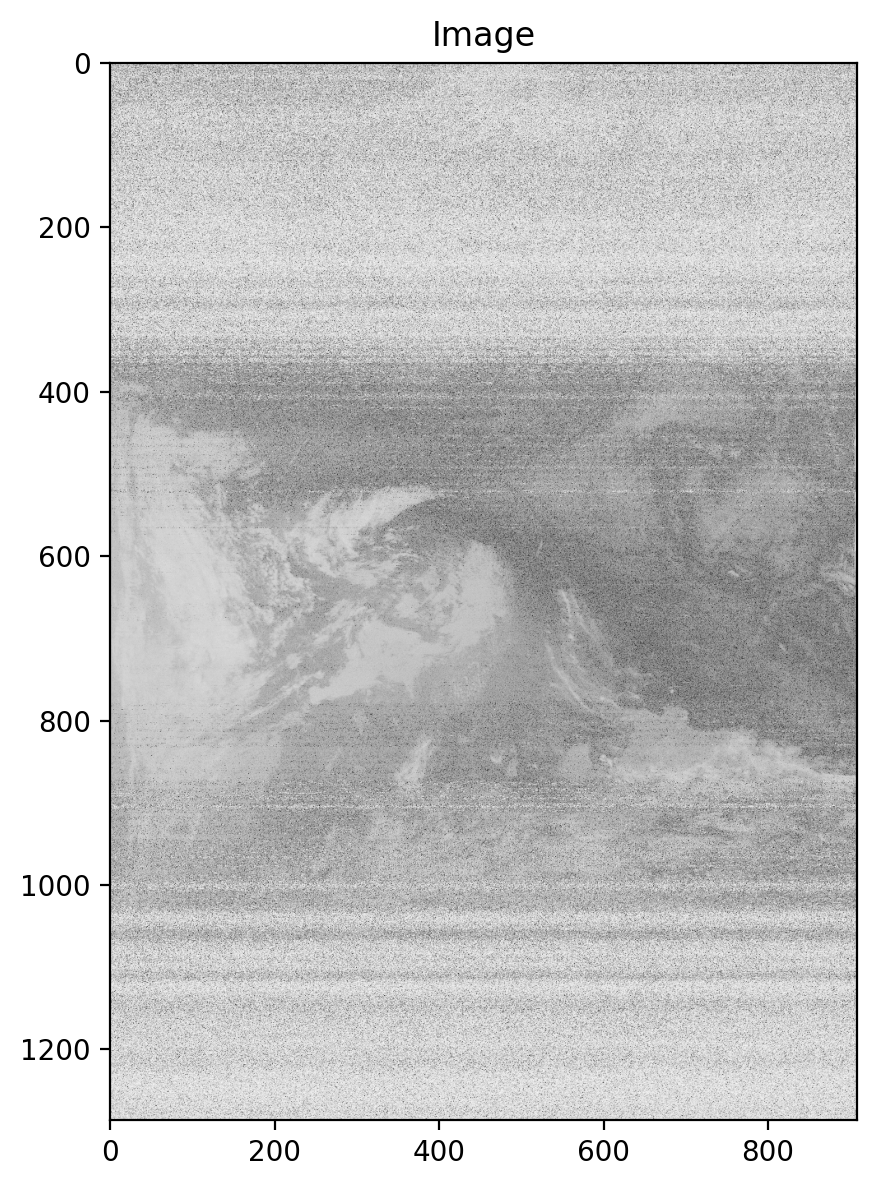

In [95]:
####### строим температурное изображение
fig, ax = plt.subplots(figsize=(10, 7), dpi=200)

# Последний элемент убираем, потому что он (может быть) заполнен не полностью
ax.imshow(matrix2[:-1, 1040+86:2080-45], cmap='gray')
plt.title('Image')
plt.show()
fig.savefig("temperature.png", dpi=100)

In [96]:
!pip install opencv-python

In [97]:
################## строим температурную диаграмму
import cv2

image = cv2.imread("temperature.png", cv2.IMREAD_GRAYSCALE)
heatmap = cv2.applyColorMap(image, cv2.COLORMAP_JET)

cv2.imshow('heatmap', heatmap)
cv2.imwrite("heatmap.png", heatmap)
cv2.waitKey()

-1